# 大作业


300 540


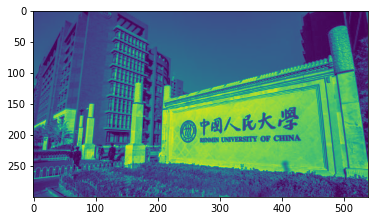

[[1, 1, 1, -1, -1], [1, 0, 0, 0, -1], [1, 0, 0, 0, -1], [1, 0, 0, 0, -1], [1, 1, 1, -1, -1]]


In [3]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#输入图像
im = np.array(Image.open('ruc.jpg').convert('L'))
print(len(im),len(im[0]))
plt.imshow(im)
plt.show()
# im是输入图像转换成的list
im = im.tolist()

# ker是卷积核对应的list
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])

ker = ker.tolist()
print(ker)

In [ ]:
#翻转核矩阵

h=len(ker)
#h为K(卷积核)矩阵的行数（列表长度）；
w=len(ker[0])
#w为K（卷积核）矩阵的列数(列表中每个元素的长度)
im_out=[]
new_ker=np.zeros((w,h))
for i in range(h):#1.翻转核矩阵
    for j in range(w):
        new_ker[i][j]=ker[h-i-1][w-j-1]
#K′[i][j]=K[h−i−1][w−j−1]
ker=new_ker

In [ ]:
#以下为有错误的函数代码

In [15]:
def conv2d(im, kernel, stride =1):    
    # 请完成本函数代码
    
    ker=kernel
    #UnboundLocalError: local variable 'ker' referenced before assignment
    #solution:把欲用的global variance(即ker) 在local context内重新赋值——ker=kernel
    
    h=len(ker)
    #h为K(卷积核)矩阵的行数（列表长度）；
    w=len(ker[0])
    #w为K（卷积核）矩阵的列数(列表中每个元素的长度)
    im_out=[]
    new_ker=np.zeros((w,h))
    for i in range(h):#1.翻转核矩阵
        for j in range(w):
            new_ker[i][j]=ker[h-i-1][w-j-1]
    #K′[i][j]=K[h−i−1][w−j−1]
    ker=new_ker
    #——————核矩阵翻转完成——————
    
    h=len(ker)
    w=len(ker[0])
    #h为K`(翻转卷积核)矩阵的行数（列表长度）；
    #w为K`（翻转后卷积核）矩阵的列数(列表中每个元素的长度)
    H=len(im)
    W=len(im[0])
    #H为im矩阵的行数
    #W为im矩阵的列数
    
    h1=int((H-h)/stride)+1
    #惊了我，"H--h"居然等价于"H+h"，我说怎么h1比H还大，以至于后面卷积老是出现IndexError……
    w1=int((W-w)/stride)+1
    #计算im_out的行数h1和列数w1
    #h1=floor((H-h)/垂直方向步长)+1 行
    #w1=floor((W-w)/水平方向步长)+1 列

    unit=0
    im_out=np.zeros((h1,w1))
    #构造h1行w1i列的m_out零矩阵，以便于承接卷积后（i，j）的值
    
    
    #下面两行，为错误发生处！！！！！！！！！！
    for i in range(0,h1,stride):
        for j in range(0,w1,stride):
            #从左上角开始，在图像上从左到右、从上到下滑动：每次向右滑动移动的步长为stride
            for u in range(h):
                for v in range(w):
                    unit+=im[i+u][j+v]*ker[u][v]
                    #将K′和其覆盖的im的对应位置的元素相乘并求和，作为这个位置的响应值，即unit
            im_out[i][j]=unit
            #把响应值存入im_out对应位置（i，j）
            unit=0
            #清空上个位置的响应值unit
    return im_out
#UnboundLocalError: local variable 'ker' referenced before assignment
#This error is raised when you try to use a variable before it has been assigned in the local context.
#solution:把欲用的global variance 在local context内重新赋值——ker=kernel

296
536


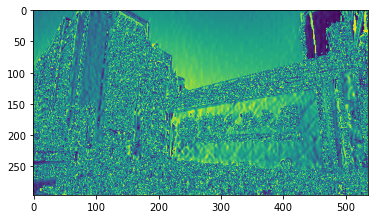

In [47]:
stride=1
try:
    for i in range(0,h1,stride):
        for j in range(0,w1,stride):
            for u in range(h):
                for v in range(w):
                    unit+=im[i+u][j+v]*ker[u][v]
            im_out[i][j]=unit
            unit=0    
except IndexError:
    print('IndexError')
    #IndexError有两个原因：
    #一个可能是下标超出范围，
    #一个可能是list是空的，没有一个元素
finally:
    #显示处理后的图像
    print(len(im_out))
    print(len(im_out[0]))
    im_out = np.array(im_out)
    im1 = Image.fromarray(im_out.astype('uint8'))
    plt.imshow(im1)
    plt.show()

# 卷积实验

In [14]:
# 用ker铺im的处理结果，更改这行参数
im_out = conv2d(im,ker,1)

#显示处理后的图像
print(len(im_out))
print(len(im_out[0]))
im_out = np.array(im_out)
im1 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im1)
plt.show()



TypeError: object of type 'function' has no len()

[[0.04, 0.04, 0.04, -0.04, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.04, 0.04, -0.04, -0.04]]
300 540
(296, 536)


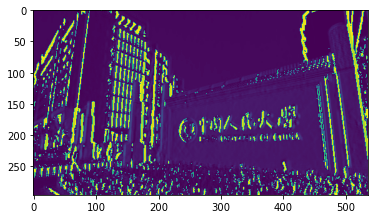

In [94]:
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])
ker2 = ker/25
ker2 = ker2.tolist()
print(ker2)

# 用ker2铺im的处理结果
print(len(im),len(im[0]))
im_out = conv2d(im,ker2,1)
print(im_out.shape)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

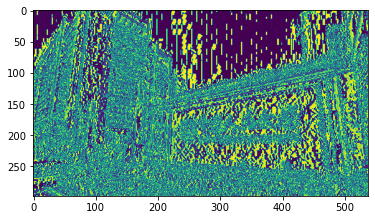

In [87]:
k3 =[[1, 0, -1], 
     [2, 0, -2], 
    [1, 0, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

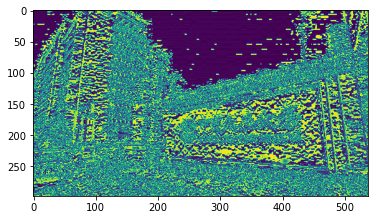

In [88]:
k3 =[[1, 2, 1], 
     [0, 0, 0], 
    [-1, -2, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

In [32]:
im = [[ 8, -1, -8,  2,  3, -9, -2,  5,  5,  5, -8],
       [ 8,  2, -8, -4,  1,  7,  6, -7,  8, -4, -6],
       [ 5,  7, -1,  2,  1, -7, -4,  1, -1,  1,  0],
       [-3,  0, -2, -2, -5, -4, -7,  5,  0, -3, -1],
       [-5,  0,  3,  1, -1,  4,  8, -2, -3, -8,  5],
       [-2, -7, -6, -3, -3, -3,  2,  5, -7,  7,  3],
       [ 8, -9, -3,  3,  0, -4, -6, -8,  6, -8, -7],
       [-6,  0,  0,  8,  3, -6,  1,  8, -2,  2,  7],
       [-4, -8,  6, -3, -9,  2, -5, -4, -9,  0, -5],
       [-6,  4, -1,  0, -4,  7,  4,  5,  0, -4, -6],
       [ 6,  4,  2, -4,  7,  4,  8, -5, -1, -7, -5]]

K = [[ 5, -3,  3,  5,  7],
       [ 0, -9,  8, -8, -8],
       [ 6,  6,  1, -5,  3],
       [-3, -9,  5,  0,  1],
       [ 1, -9, -6,  0,  8]]

print(conv2d(im, K))
#print(conv2d(im, K, 2))

[[87, -26, -86, 134, 99, -71, 118], [57, -80, -238, -198, 24, 11, -46], [81, 97, 201, 162, -73, -147, -249], [-102, 130, 77, 164, 35, -69, 356], [-90, 27, -99, -430, -197, 251, -221], [184, 137, -151, 270, 68, 64, 165], [53, -125, 34, 45, 2, -54, -113]]


In [33]:
print(conv2d(im, K, 2))

[[87, -86, 99, 118], [81, 201, -73, -249], [-90, -99, -197, -221], [53, 34, 2, -113]]


In [34]:
im = [[1, 1, 0, 0],
             [1, 1, 0, 0],
             [0, 0, 1, 1],
             [0, 0, 1, 1]]
K = [[1, 1],
      [1, 1]]
print(conv2d(im, K, 2))

[[4, 0], [0, 4]]


In [ ]:
im = [[1, 1, 0, 0],
    [1, 1, 0, 0],
     [0, 0, 1, 1],
     [0, 0, 1, 1]]
K = [[1, 1],
    [1, 1]]
stride = 2
output=conv2d(im,K,stride)
''' 输出：
         [[4, 0],
          [0, 4]]'''
output#真奇怪，为啥不一样捏？

In [5]:
def a(t):
    h=len(t)
    w=len(t[0])
    for i in range(int(h/2)):#1.翻转核矩阵
            for j in range(w):
                t[i][j],t[h-i-1][w-j-1]=t[h-i-1][w-j-1],t[i][j]

S=[
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
]

a(S)

print(S)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]


In [9]:
def ker(ker):
    h=len(ker)
    #h为K(卷积核)矩阵的行数（列表长度）；
    w=len(ker[0])
    #w为K（卷积核）矩阵的列数(列表中每个元素的长度)
    im_out=[]
    new_ker=np.zeros((w,h))
    for i in range(h):#1.翻转核矩阵
        for j in range(w):
            new_ker[i][j]=ker[h-i-1][w-j-1]
    #K′[i][j]=K[h−i−1][w−j−1]
    ker=new_ker
    return ker 
S=[
    [1,2,3],
    [5,6,7],
    [9,10,11]
]
ker(S)

array([[11., 10.,  9.],
       [ 7.,  6.,  5.],
       [ 3.,  2.,  1.]])

In [12]:
im = [[1, 1, 0, 0],
    [1, 1, 0, 0],
     [0, 0, 1, 1],
     [0, 0, 1, 1]]
K = [[1, 1],
    [1, 1]]
stride = 2
print(conv2d(im,K,stride))
#真奇怪，为啥不一样捏？

[[4. 0.]
 [0. 0.]]


In [13]:
im = [[ 8, -1, -8,  2,  3, -9, -2,  5,  5,  5, -8],
       [ 8,  2, -8, -4,  1,  7,  6, -7,  8, -4, -6],
       [ 5,  7, -1,  2,  1, -7, -4,  1, -1,  1,  0],
       [-3,  0, -2, -2, -5, -4, -7,  5,  0, -3, -1],
       [-5,  0,  3,  1, -1,  4,  8, -2, -3, -8,  5],
       [-2, -7, -6, -3, -3, -3,  2,  5, -7,  7,  3],
       [ 8, -9, -3,  3,  0, -4, -6, -8,  6, -8, -7],
       [-6,  0,  0,  8,  3, -6,  1,  8, -2,  2,  7],
       [-4, -8,  6, -3, -9,  2, -5, -4, -9,  0, -5],
       [-6,  4, -1,  0, -4,  7,  4,  5,  0, -4, -6],
       [ 6,  4,  2, -4,  7,  4,  8, -5, -1, -7, -5]]

K = [[ 5, -3,  3,  5,  7],
       [ 0, -9,  8, -8, -8],
       [ 6,  6,  1, -5,  3],
       [-3, -9,  5,  0,  1],
       [ 1, -9, -6,  0,  8]]

stride =1
print(conv2d(im,K,stride))

'''输出：
         [[87, -26, -86, 134, 99, -71, 118], 
[57, -80, -238, -198, 24, 11, -46], 
[81, 97, 201, 162, -73, -147, -249], 
[-102, 130, 77, 164, 35, -69, 356], 
[-90, 27, -99, -430, -197, 251, -221], 
[184, 137, -151, 270, 68, 64, 165], 
[53, -125, 34, 45, 2, -54, -113]]
'''
stride=2
conv2d(im,K,stride)
'''[[87, -86, 99, 118], [81, 201, -73, -249], [-90, -99, -197, -221], [53, 34, 2, -113]]'''

[[  87.  -26.  -86.  134.   99.  -71.  118.]
 [  57.  -80. -238. -198.   24.   11.  -46.]
 [  81.   97.  201.  162.  -73. -147. -249.]
 [-102.  130.   77.  164.   35.  -69.  356.]
 [ -90.   27.  -99. -430. -197.  251. -221.]
 [ 184.  137. -151.  270.   68.   64.  165.]
 [  53. -125.   34.   45.    2.  -54. -113.]]


'[[87, -86, 99, 118], [81, 201, -73, -249], [-90, -99, -197, -221], [53, 34, 2, -113]]'

# 函数调试后

In [30]:
def conv2d(im, kernel, stride =1):    
    # 请完成本函数代码
    
    ker=kernel
    #UnboundLocalError: local variable 'ker' referenced before assignment
    #solution:把欲用的global variance(即ker) 在local context内重新赋值——ker=kernel
    
    h=len(ker)
    #h为K(卷积核)矩阵的行数（列表长度）；
    w=len(ker[0])
    #w为K（卷积核）矩阵的列数(列表中每个元素的长度)
    im_out=[]
    new_ker=np.zeros((w,h))
    for i in range(h):#1.翻转核矩阵
        for j in range(w):
            new_ker[i][j]=ker[h-i-1][w-j-1]
    #K′[i][j]=K[h−i−1][w−j−1]
    ker=new_ker
    #——————核矩阵翻转完成——————
    
    h=len(ker)
    w=len(ker[0])
    #h为K`(翻转卷积核)矩阵的行数（列表长度）；
    #w为K`（翻转后卷积核）矩阵的列数(列表中每个元素的长度)
    H=len(im)
    W=len(im[0])
    #H为im矩阵的行数
    #W为im矩阵的列数
    print("h:{},w:{}".format(h,w))
    
    h1=int((H-h)/stride)+1
    w1=int((W-w)/stride)+1
    #计算im_out的行数h1和列数w1
    #h1=floor((H-h)/垂直方向步长)+1 行
    #w1=floor((W-w)/水平方向步长)+1 列
    print("h1:{},w1:{}".format(h1,w1))
    
    unit=0
    im_out=np.zeros((h1,w1))
    #构造h1行w1i列的m_out零矩阵，以便于承接卷积后（i，j）的值
    for i in [i*stride for i in range(h1)]:
        #卷积核要沿着每一列卷积h1次，
        io= int(i/stride)
        for j in [j*stride for j in range(w1)]:
        #卷积核要沿着每一行运算w1次
        #从左上角开始，在图像上从左到右、从上到下滑动：每次向右滑动移动的步长为stride
            jo=int(j/stride)
            
            for u in range(h):
                for v in range(w):
                    unit+=im[i+u][j+v]*ker[u][v]
                    #将K′和其覆盖的im的对应位置的元素相乘并求和，作为这个位置的响应值，即unit
                    print("u:{},v:{},unit:{}".format(u,v,unit))
                    
            print("i:{},j:{},unit:{}\n".format(i,j,unit))
            im_out[io][jo]=unit
            #把响应值存入im_out对应位置（i，j）
            unit=0
            #清空上个位置的响应值unit
    return im_out

im = [[1, 1, 0, 0],
    [1, 1, 0, 0],
     [0, 0, 1, 1],
     [0, 0, 1, 1]]
K = [[1, 1],
    [1, 1]]
stride = 2
print(conv2d(im,K,stride))

h:2,w:2
h1:2,w1:2
u:0,v:0,unit:1.0
u:0,v:1,unit:2.0
u:1,v:0,unit:3.0
u:1,v:1,unit:4.0
i:0,j:0,unit:4.0

u:0,v:0,unit:0.0
u:0,v:1,unit:0.0
u:1,v:0,unit:0.0
u:1,v:1,unit:0.0
i:0,j:2,unit:0.0

u:0,v:0,unit:0.0
u:0,v:1,unit:0.0
u:1,v:0,unit:0.0
u:1,v:1,unit:0.0
i:2,j:0,unit:0.0

u:0,v:0,unit:1.0
u:0,v:1,unit:2.0
u:1,v:0,unit:3.0
u:1,v:1,unit:4.0
i:2,j:2,unit:4.0

[[4. 0.]
 [0. 4.]]
